In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## EDA

In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

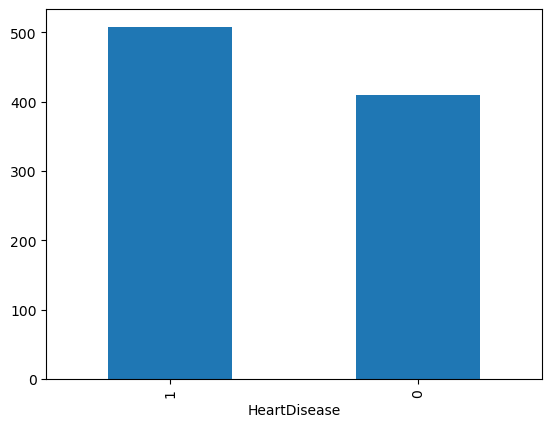

In [8]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Have a error of Bp and Cholestrol.

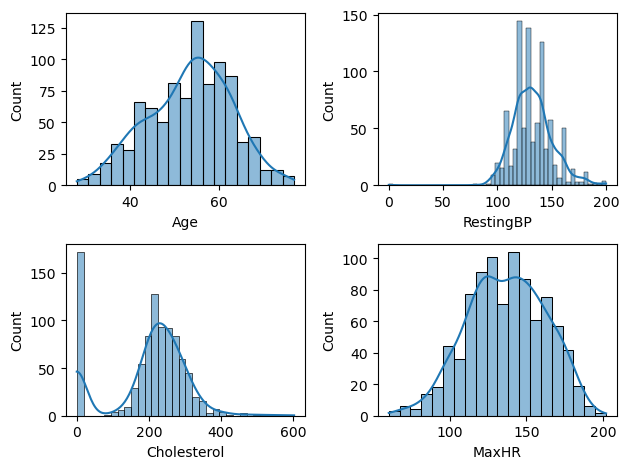

In [11]:
def plotting(var,num):  # Function to plot histograms with KDE for specified variables.
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

plt.tight_layout() # Adjust layout to prevent overlap.
plt.show() # Display the plots.


In [12]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

## Fix it

In [13]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()  # Calculate mean of Cholesterol excluding zero values.
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)  # Replace zero values with the calculated mean.
df['Cholesterol'] = df['Cholesterol'].round(2)  # Round the values to 2 decimal places.

In [14]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()  # Calculate mean of RestingBP excluding zero values.

df['RestingBP'] = df['RestingBP'].replace(0, ch_mean)  # Replace zero values with the calculated mean.
df['RestingBP'] = df['RestingBP'].round(2)  # Round the values to 2 decimal places.

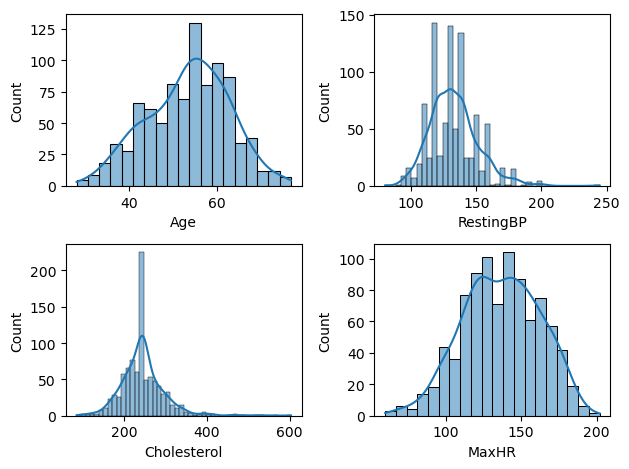

In [15]:
def plotting(var,num):  # Function to plot histograms with KDE for specified variables.
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

plt.tight_layout() # Adjust layout to prevent overlap.
plt.show() # Display the plots.


In [16]:
%pip install sheryanalysis==0.1.0

Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install sheryanalysis==0.1.0

import sheryanalysis as sh 
sh.analyze(df)

Note: you may need to restart the kernel to use updated packages.


ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of c:\Users\arish\anaconda3\Lib\site-packages\sklearn\__check_build:
meson.build               _check_build.cp312-win_amd64.lib_check_build.cp312-win_amd64.pyd
_check_build.pyx          __init__.py               __pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

<Axes: xlabel='Sex', ylabel='count'>

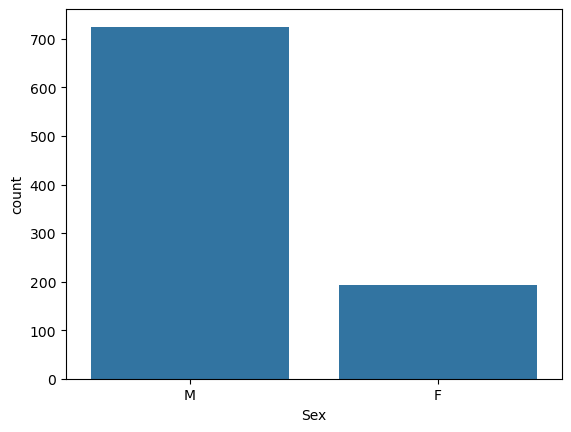

In [ ]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

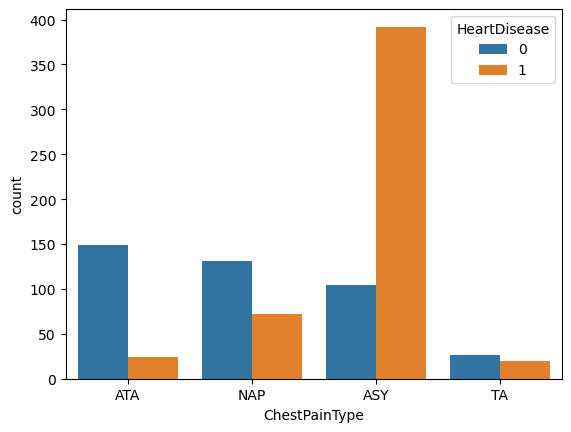

In [ ]:
sns.countplot(x = df['ChestPainType'], hue = df['HeartDisease'])

<Axes: xlabel='Sex', ylabel='count'>

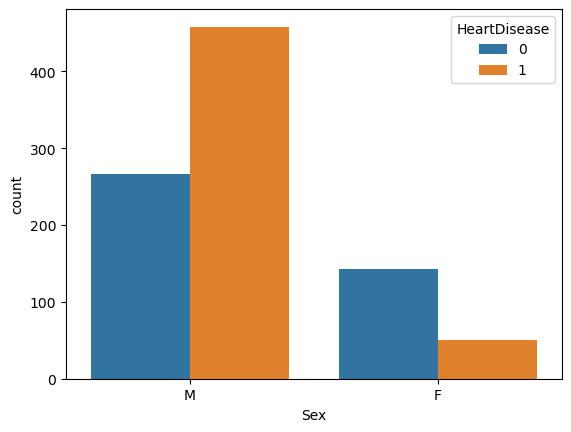

In [ ]:
sns.countplot(x = df['Sex'], hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

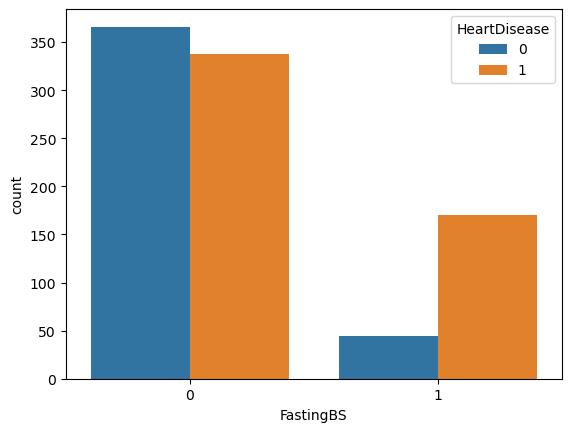

In [ ]:
sns.countplot(x = df['FastingBS'], hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

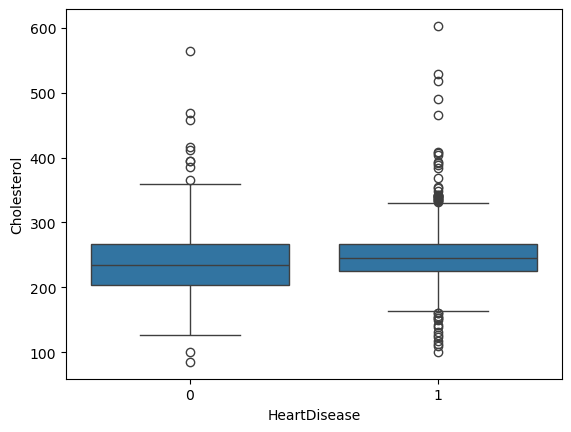

In [ ]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol', data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

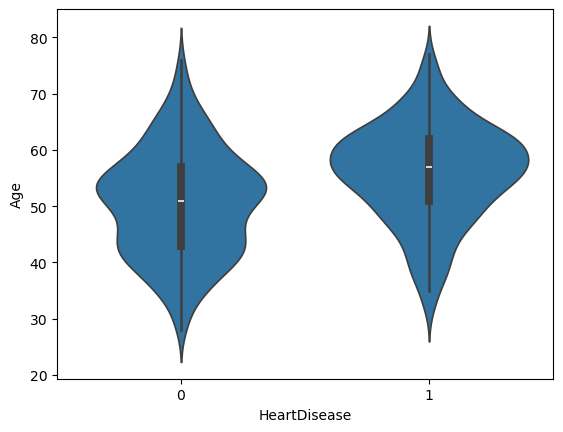

In [ ]:
sns.violinplot(x = 'HeartDisease', y = 'Age', data = df)

<Axes: >

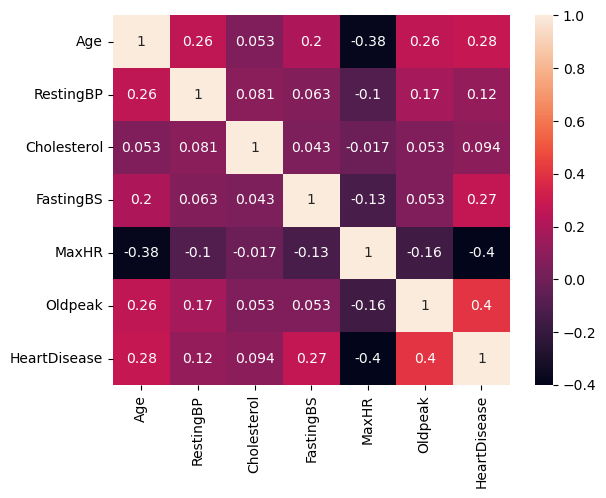

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data Preprocessing and Cleaning.

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to dummy variables.
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [ ]:
df_encoded = df_encoded.astype(int)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of c:\Users\arish\anaconda3\Lib\site-packages\sklearn\__check_build:
meson.build               _check_build.cp312-win_amd64.lib_check_build.cp312-win_amd64.pyd
_check_build.pyx          __init__.py               __pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [ ]:
X = df_encoded.drop('HeartDisease',axis = 1)
y  = df_encoded['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

In [ ]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(n_neighbors = 5),
    "Naive Byeas" : GaussianNB(),
    "Decision tree" : DecisionTreeClassifier(),
    "SVM (RBF Kernel)" : SVC(probability=True)
}

NameError: name 'LogisticRegression' is not defined

In [ ]:
results= []

In [ ]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    results.append({
        'model' : name,
        'Accuracy' : round(acc,4),
        'f1 score' : round(f1,4)
    })

In [ ]:
results

[{'model': 'Logistic Regression', 'Accuracy': 0.8696, 'f1 score': 0.8857},
 {'model': 'KNN', 'Accuracy': 0.8696, 'f1 score': 0.8857},
 {'model': 'Naive Byeas', 'Accuracy': 0.8533, 'f1 score': 0.8683},
 {'model': 'Decision tree', 'Accuracy': 0.7772, 'f1 score': 0.8019},
 {'model': 'SVM (RBF Kernel)', 'Accuracy': 0.8478, 'f1 score': 0.8679}]

In [ ]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']